In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib as mpl

from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dropout, Dense
#from keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(0)

# Plots the figure in the kernel rather than opening a window or tab.
%matplotlib inline

# Set the universal size for figure
rcParams['figure.figsize'] = (10, 8)
plt.style.use("ggplot")
mpl.rc("savefig", dpi = 200)

In [2]:
import chainer as ch
print(ch.print_runtime_info())

Platform: Linux-5.4.0-80-generic-x86_64-with-Ubuntu-18.04-bionic
Chainer: 7.8.0
ChainerX: Not Available
NumPy: 1.19.5
CuPy:
  CuPy Version          : 7.8.0
  CUDA Root             : /usr/local/cuda
  CUDA Build Version    : 10010
  CUDA Driver Version   : 11010
  CUDA Runtime Version  : 10010
  cuBLAS Version        : 10201
  cuFFT Version         : 10101
  cuRAND Version        : 10101
  cuSOLVER Version      : (10, 2, 0)
  cuSPARSE Version      : 10300
  NVRTC Version         : (10, 1)
  cuDNN Build Version   : 7605
  cuDNN Version         : 7605
  NCCL Build Version    : 2708
  NCCL Runtime Version  : 2708
  CUB Version           : None
  cuTENSOR Version      : None
iDeep: Not Available
None


In [3]:
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

In [4]:
train_df['Family'] =  train_df["Parch"] + train_df["SibSp"]
train_df['Family'].loc[train_df['Family'] > 0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


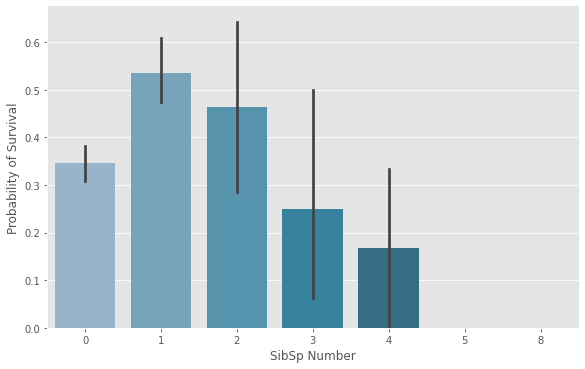

In [5]:
plot = sns.factorplot(x = 'SibSp', y = 'Survived', data = train_df, kind = 'bar', height = 5, aspect = 1.6, palette = "PuBuGn_d")
_    = plot.set_ylabels("Probability of Survival")
_    = plot.set_xlabels("SibSp Number")

plt.show()

In [6]:
train_df = train_df.drop(['Parch', 'SibSp'], axis = 1)
test_df = test_df.drop(['Parch', 'SibSp'], axis = 1)

In [7]:
print("[+] Basic Information on Training Dataset: \n")
print(train_df.info())

print('')
print("[+] Basic Information on Testing Dataset: \n")
print(test_df.info())

[+] Basic Information on Training Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Family       891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None

[+] Basic Information on Testing Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

In [8]:
print("[+] Basic Statistics on Training DataFrame: \n")
print(train_df.describe())

print('')
print("[+] Basic Statistics on Testing DataFrame: \n")
print(test_df.describe())

[+] Basic Statistics on Training DataFrame: 

       PassengerId    Survived      Pclass         Age        Fare      Family
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118   32.204208    0.397306
std     257.353842    0.486592    0.836071   14.526497   49.693429    0.489615
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    7.910400    0.000000
50%     446.000000    0.000000    3.000000   28.000000   14.454200    0.000000
75%     668.500000    1.000000    3.000000   38.000000   31.000000    1.000000
max     891.000000    1.000000    3.000000   80.000000  512.329200    1.000000

[+] Basic Statistics on Testing DataFrame: 

       PassengerId      Pclass         Age        Fare      Family
count   418.000000  418.000000  332.000000  417.000000  418.000000
mean   1100.500000    2.265550   30.272590   35.627188    0.394

In [9]:
print("[+] First Five Rows of Training DataFrame:")
print("##########################################\n")

print(train_df.head(5))
print("")


print("[+] First Five Rows of Testing DataFrame:")
print("##########################################\n")

print(test_df.head(5))

[+] First Five Rows of Training DataFrame:
##########################################

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket     Fare Cabin Embarked  Family  
0         A/5 21171   7.2500   NaN        S       1  
1          PC 17599  71.2833   C85        C       1  
2  STON/O2. 3101282   7.9250   NaN        S       0  
3            113803  53.1000  C123        S       1  
4    

In [10]:
print("[+] The Name Column of Training Dataset:")
print("#######################################\n")

print(train_df['Name'].head())

[+] The Name Column of Training Dataset:
#######################################

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


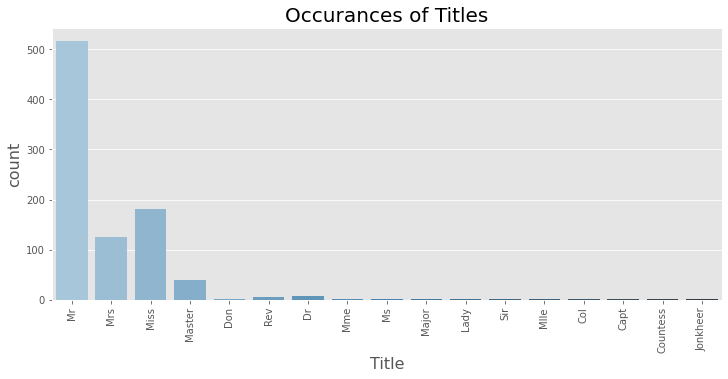

In [11]:
train_df['Title'] = train_df['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

_ = plt.figure(figsize = (12, 5))
_ = plt.xlabel("Title", fontsize = 16)
_ = plt.ylabel("Count", fontsize = 16)
_ = plt.title("Occurances of Titles", fontsize = 20)
_ = plt.xticks(rotation = 90)

sns.countplot(x = 'Title', data = train_df, palette = "Blues_d")

plt.show()

# Repeat the same procedure for testing dataset
test_df['Title'] = test_df["Name"].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [12]:
#re.search(' ([A-Z][a-z]+)\.', test_df['Name'][0]).group(1)

In [13]:
train_df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [14]:
Title_dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
}

train_df['Title'] = train_df['Title'].map(Title_dictionary)
test_df['Title'] = test_df['Title'].map(Title_dictionary)


In [15]:
train_df['Title'].map({'Miss': 'ミズ'})

0      NaN
1      NaN
2       ミズ
3      NaN
4      NaN
      ... 
886    NaN
887     ミズ
888     ミズ
889    NaN
890    NaN
Name: Title, Length: 891, dtype: object

In [16]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family', 'Title'],
      dtype='object')

[+] First 5 Rows of the  'Pclass' column: 
########################################

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

[+] Count of Categories in Tabular Format: 
##########################################

3    491
1    216
2    184
Name: Pclass, dtype: int64


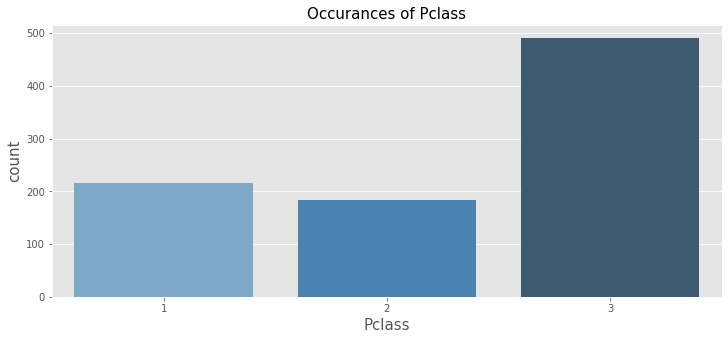

In [17]:
print("[+] First 5 Rows of the  'Pclass' column: ")
print("########################################\n")
print(train_df['Pclass'].head())
print("")

print("[+] Count of Categories in Tabular Format: ")
print("##########################################\n")
print(train_df['Pclass'].value_counts())

_ = plt.figure(figsize = (12, 5))
_ = plt.xlabel("Pclass", fontsize = 15)
_ = plt.ylabel("Count", fontsize = 15)
_ = plt.title("Occurances of Pclass", fontsize = 15)
_ = plt.xticks(rotation = 0)

sns.countplot(x = 'Pclass', data = train_df, palette = "Blues_d")

plt.show()

[+] First 5 Rows of the  'Sex' column: 
########################################

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

[+] Count of Genders in Tabular Format: 
##########################################

male      577
female    314
Name: Sex, dtype: int64


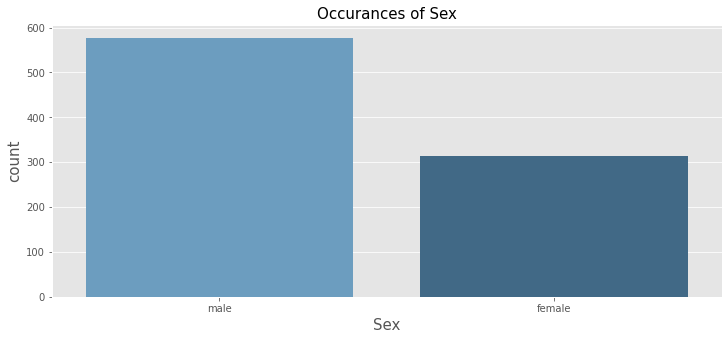

In [18]:

print("[+] First 5 Rows of the  'Sex' column: ")
print("########################################\n")
print(train_df['Sex'].head())
print("")

print("[+] Count of Genders in Tabular Format: ")
print("##########################################\n")
print(train_df['Sex'].value_counts())

_ = plt.figure(figsize = (12, 5))
_ = plt.xlabel("Sex", fontsize = 15)
_ = plt.ylabel("Count", fontsize = 15)
_ = plt.title("Occurances of Sex", fontsize = 15)
_ = plt.xticks(rotation = 0)

sns.countplot(x = 'Sex', data = train_df, palette = "Blues_d")

plt.show()

In [19]:
# Basic EDA and Imputation of Null Cells

print("[+] The first five rows of the 'Age' column: ")
print("##########################################\n")
print(train_df['Age'].head())
print("")

print("[+] Total Number of Null Values : ", train_df["Age"].isnull().sum())

# Imputing the NaN values from the column
train_df.loc[train_df.Age.isnull(), 'Age'] = train_df.groupby(['Sex','Pclass','Title'])['Age'].transform('median')
test_df.loc[test_df.Age.isnull(), 'Age']   = test_df.groupby(['Sex','Pclass','Title'])['Age'].transform('median')

print("[+] Total Null Values after Imputation: ", train_df["Age"].isnull().sum())

[+] The first five rows of the 'Age' column: 
##########################################

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

[+] Total Number of Null Values :  177
[+] Total Null Values after Imputation:  0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


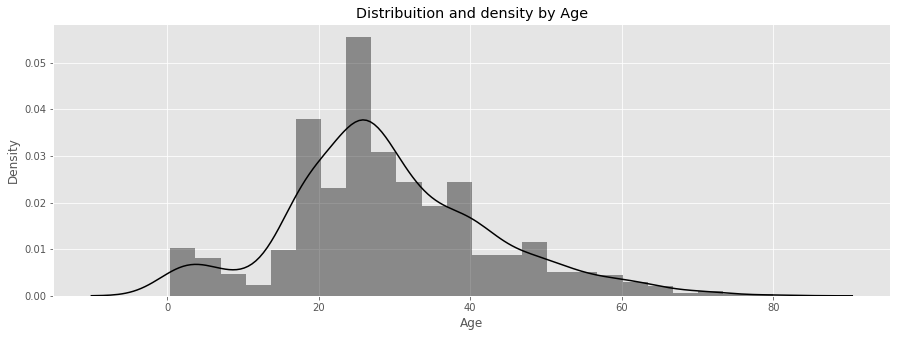

In [20]:
# Plotting the data

_ = plt.figure(figsize = (15,5))
_ = plt.title("Distribuition and density by Age")
_ = plt.xlabel("Age")
_ = plt.xticks(rotation = 0)

sns.distplot(train_df["Age"], bins = 24,  color = 'black') # bins=棒の数

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

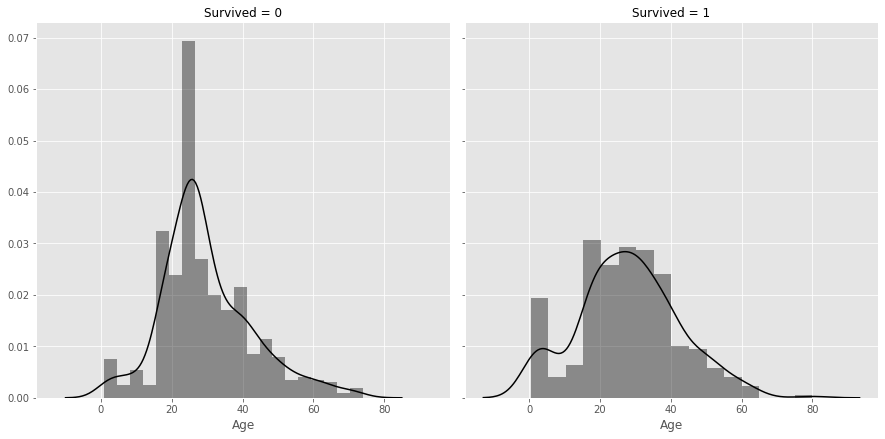

In [21]:
plt.figure(figsize=(15,5))

plot = sns.FacetGrid(train_df, col = "Survived", size = 6.2)
plot = plot.map(sns.distplot, "Age", color = 'black')

plt.show()

In [22]:
age_intervals = (0, 5, 12, 18, 25, 35, 60, 120)
categories    = ['Babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

train_df["Age_Category"] = pd.cut(train_df['Age'], age_intervals, labels = categories)
test_df["Age_Category"]  = pd.cut(test_df['Age'], age_intervals, labels = categories)

In [23]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,Mr,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,Mrs,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,Mr,Young


Survived        0   1
Age_Category         
Babies         15  33
Children       16   9
Teen           54  49
Student       108  56
Young         206  99
Adult         133  91
Senior         17   5


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


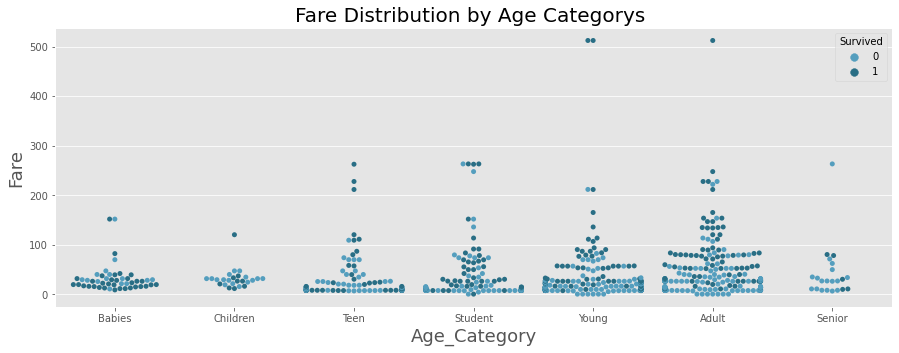

In [24]:
print(pd.crosstab(train_df['Age_Category'], train_df['Survived']))

_ = plt.figure(figsize = (15, 5))
_ = plt.ylabel("Fare Distribution", fontsize=18)
_ = plt.xlabel("Age Categorys", fontsize=18)
_ = plt.title("Fare Distribution by Age Categorys ", fontsize=20)

sns.swarmplot(x = 'Age_Category',y = "Fare", data = train_df, hue = "Survived", palette = "PuBuGn_d")

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


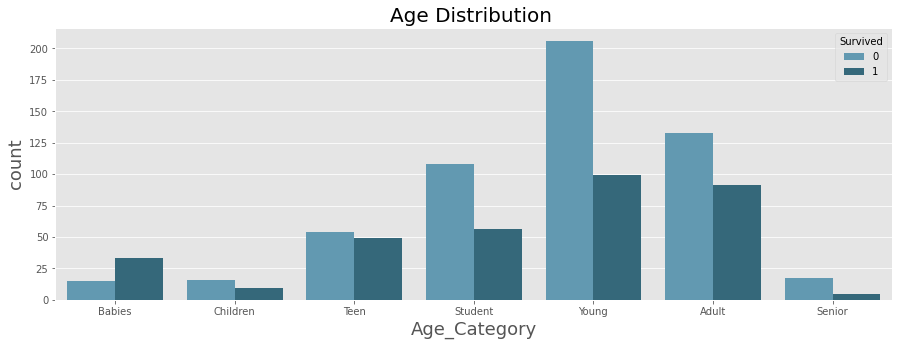

In [25]:
# Figure Setup
_ = plt.figure(figsize=(15, 5))
_ = plt.ylabel("Count", fontsize = 18)
_ = plt.xlabel("Age Categorys", fontsize = 18)
_ = plt.title("Age Distribution ", fontsize = 20)

sns.countplot("Age_Category",data = train_df, hue = "Survived", palette = "PuBuGn_d")

# Plot the figure
plt.show()

In [26]:
# Remove the irrelevent columns
train_dataset = train_df.drop(columns = ['Fare', 'Ticket', 'Age', 'Cabin', 'Name'])
test_dataset  = test_df.drop(columns = ['Fare', 'Ticket', 'Age', 'Cabin', 'Name'])

In [27]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family,Title,Age_Category
0,1,0,3,male,S,1,Mr,Student
1,2,1,1,female,C,1,Mrs,Adult
2,3,1,3,female,S,0,Miss,Young
3,4,1,1,female,S,1,Mrs,Young
4,5,0,3,male,S,0,Mr,Young


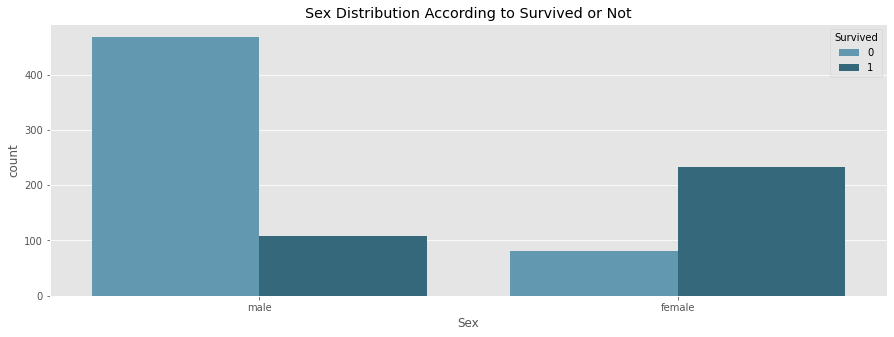

In [28]:
_ = plt.figure(figsize = (15, 5))
_ = plt.title("Sex Distribution According to Survived or Not")
_ = plt.xlabel("Sex Distribution")
_ = plt.ylabel("Count")

sns.countplot(x = "Sex", data = train_dataset, hue = "Survived", palette = 'PuBuGn_d')

plt.show()

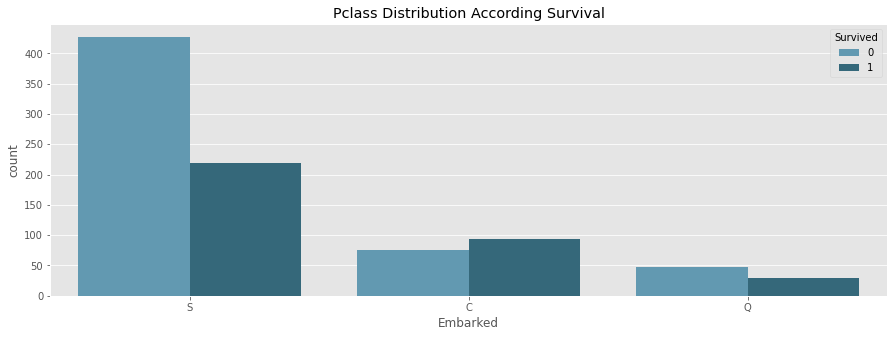

In [29]:
train_dataset["Embarked"] = train_dataset["Embarked"].fillna('S')
test_dataset["Embarked"]  = test_dataset["Embarked"].fillna('S')

_ = plt.figure(figsize = (15, 5))
_ = plt.title("Pclass Distribution According Survival")
_ = plt.xlabel("Embarked")
_ = plt.ylabel("Count")

sns.countplot(x = 'Embarked', data = train_dataset, hue = 'Survived', palette = 'PuBuGn_d')

plt.show()

In [30]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Sex", "Embarked", "Age_Category", "Title"], prefix = ["Sex", "Emb", "Age", "Prefix"], drop_first = True)
test_dataset  = pd.get_dummies(test_dataset, columns = ["Sex", "Embarked", "Age_Category", "Title"], prefix = ["Sex", "Emb", "Age", "Prefix"], drop_first = True)

In [31]:
train_dataset

,PassengerId,Survived,Pclass,Family,Sex_male,Emb_Q,Emb_S,Age_Children,Age_Teen,Age_Student,Age_Young,Age_Adult,Age_Senior,Prefix_Miss,Prefix_Mr,Prefix_Mrs,Prefix_Officer,Prefix_Royalty
0,1,0,3,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3,1,3,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,4,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,5,0,3,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
887,888,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
888,889,0,3,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
889,890,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


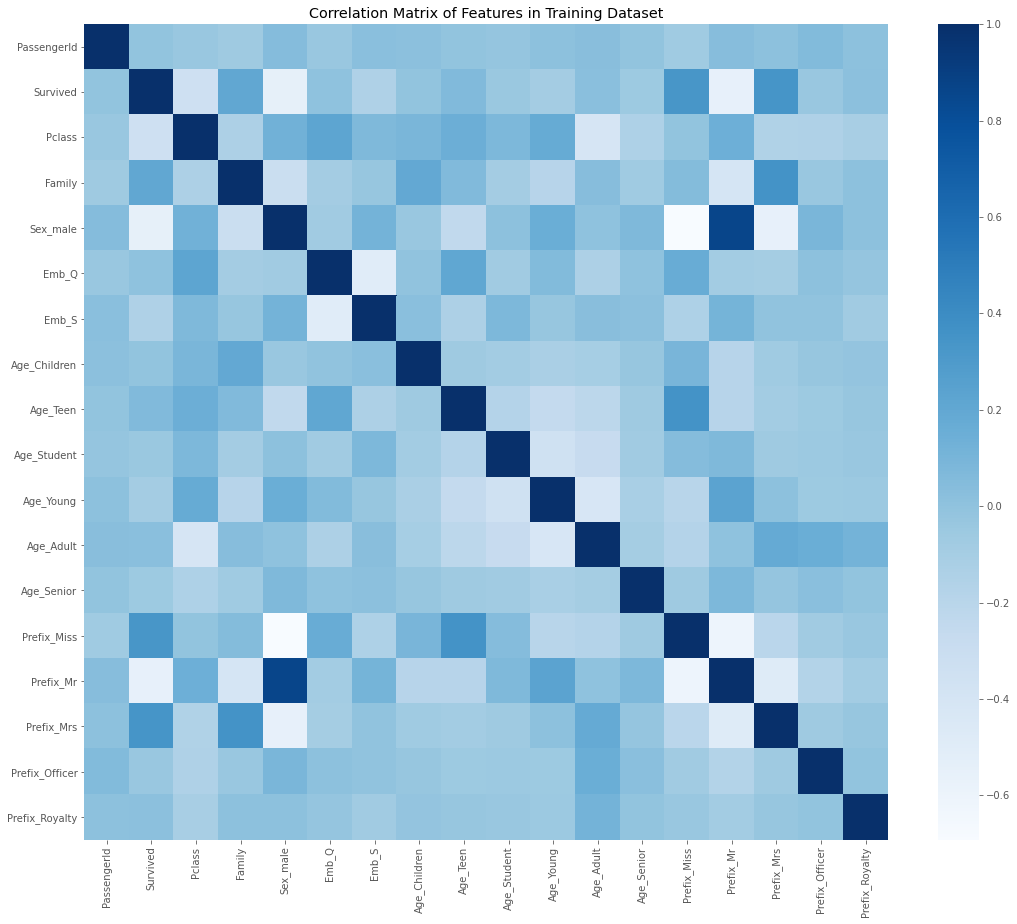

In [32]:
# Plotting the correlation matrix

_ = plt.figure(figsize = (18, 15))
_ = plt.title("Correlation Matrix of Features in Training Dataset")
_ = sns.heatmap(train_dataset.astype(float).corr(), vmax = 1.0, annot = False, cmap = "Blues")

plt.show()

In [33]:
#train_dataset.columns.tolist()
#test_dataset.columns.tolist()

In [34]:
training_data = train_dataset.drop(['Survived', 'PassengerId'], axis = 1)
training_target = train_dataset["Survived"]

testing_data = test_dataset.drop(["PassengerId"], axis = 1)

X_train = training_data.values 
y_train = training_target.values
X_test = (testing_data.values).astype(np.float64, copy = False)

In [35]:
testing_data.values

array([[3, 0, 1, ..., 0, 0, 0],
       [3, 1, 0, ..., 1, 0, 0],
       [2, 0, 1, ..., 0, 0, 0],
       ...,
       [3, 0, 1, ..., 0, 0, 0],
       [3, 0, 1, ..., 0, 0, 0],
       [3, 1, 1, ..., 0, 0, 0]])

In [36]:
# Chainer がデフォルトで用いる float32 型へ変換
X_train = np.array(X_train, np.float32)
y_train = np.array(y_train, np.int32)

In [37]:
from chainer.datasets import TupleDataset

# 入力値と目標値を引数に与え、`TupleDataset` オブジェクトを作成
dataset = TupleDataset(X_train, y_train)

from chainer.datasets import split_dataset_random

n_train = int(len(dataset) * 0.85)
n_valid = int(len(dataset) * 0.15)

train, valid = split_dataset_random(dataset, n_train, seed=0)
#valid, test = split_dataset_random(valid_test, n_valid, seed=0)

print('Training dataset size:', len(train))
print('Validation dataset size:', len(valid))
#print('Test dataset size:', len(test))

Training dataset size: 757
Validation dataset size: 134


In [38]:
import chainer
from chainer import datasets, iterators
from chainer import Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions

chainer.config.debug = True

In [39]:
def MLP():
    layer = chainer.Sequential(L.Linear(9), F.selu)
    model = layer.repeat(4)
    model.append(L.Linear(2))
    
    return model

In [40]:
class DNN(Chain):
    def __init__(self, n_mid_units=15, n_out=2):
        super(DNN, self).__init__()
        #super().__init__()
        
        with self.init_scope():
            self.l1 = L.Linear(None, n_mid_units)
            self.l2 = L.Linear(n_mid_units, n_mid_units)
            self.l3 = L.Linear(n_mid_units, n_mid_units)
            self.l4 = L.Linear(n_mid_units, n_out)
 
    #def forward(self, x):
    def __call__(self, x):
        #h1 = F.selu(self.l1(x))
        #h2 = F.selu(self.l2(h1))
        #h3 = F.selu(self.l3(h2))
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        y = self.l4(h3)
        return y

In [41]:
batchsize = 2

#train_X, test = datasets.split_dataset_random(datasets.TupleDataset(X, Y), 623)
train_iter = iterators.SerialIterator(train, batch_size=batchsize, shuffle=True)
test_iter = iterators.SerialIterator(valid, batch_size=batchsize, repeat=False, shuffle=False)

In [42]:
gpu_id = 0
nn = DNN()
#nn = MLP()
if gpu_id >= 0:
    nn.to_gpu(gpu_id)
    
model = L.Classifier(nn)

if gpu_id >= 0:
    model.to_gpu(gpu_id)

#optimizer = optimizers.SGD()
optimizer = optimizers.Adam()
#optimizer = optimizers.MomentumSGD(lr=0.1)
optimizer.setup(model)

updater = training.StandardUpdater(train_iter, optimizer, device=gpu_id)

In [43]:
max_epoch = 25

trainer = training.Trainer(updater, (max_epoch, 'epoch'), out="result")
#trainer = training.Trainer(updater, (100, 'iteration'), out="result")

In [44]:
#trainer.extend(extensions.LogReport())
trainer.extend(extensions.LogReport(trigger=(1, 'epoch'), log_name='log'))
#trainer.extend(extensions.snapshot(filename='snapshot_epoch-{.updater.epoch}'))
trainer.extend(extensions.dump_graph('main/loss'))
trainer.extend(extensions.Evaluator(test_iter, model, device=gpu_id))
#trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy']))
#trainer.extend(extensions.PrintReport(['epoch', 'iteration', 'main/loss', 'main/accuracy', 'val/main/loss', 'val/main/accuracy', 'fc1/W/data/mean', 'elapsed_time']))
trainer.extend(extensions.PrintReport(['epoch', 'iteration', 'main/loss', 'main/accuracy', 'val/main/loss', 'val/main/accuracy', 'elapsed_time']))
trainer.extend(extensions.PlotReport(['fc1/W/grad/mean'], x_key='epoch', file_name='mean.png'))
trainer.extend(extensions.PlotReport(['main/loss', 'val/main/loss'], x_key='epoch', file_name='loss.png'))
trainer.extend(extensions.PlotReport(['main/accuracy', 'val/main/accuracy'], x_key='epoch', file_name='accuracy.png'))
trainer.extend(extensions.ParameterStatistics(model.predictor.l1, {'mean': np.mean}, report_grads=True))
trainer.extend(extensions.ProgressBar())

#trainer.extend(extensions.LogReport(trigger=(1, 'epoch'), log_name='log'))
#trainer.extend(extensions.snapshot(filename='snapshot_epoch-{.updater.epoch}'))
#trainer.extend(extensions.dump_graph('main/loss'))
#trainer.extend(extensions.Evaluator(test_iter, model, device=0), name='val')
#trainer.extend(extensions.PrintReport(['epoch', 'iteration', 'main/loss', 'main/accuracy', 'val/main/loss', 'val/main/accuracy', 'fc1/W/data/mean', 'elapsed_time']))
#trainer.extend(extensions.PlotReport(['fc1/W/grad/mean'], x_key='epoch', file_name='mean.png'))
#trainer.extend(extensions.PlotReport(['main/loss', 'val/main/loss'], x_key='epoch', file_name='loss.png'))
#trainer.extend(extensions.PlotReport(['main/accuracy', 'val/main/accuracy'], x_key='epoch', file_name='accuracy.png'))
#trainer.extend(extensions.ParameterStatistics(model.predictor.l1, {'mean': np.mean}, report_grads=True))

trainer.run()

epoch       iteration   main/loss   main/accuracy  val/main/loss  val/main/accuracy  elapsed_time
     total [..................................................]  1.06%
this epoch [#############.....................................] 26.42%
       100 iter, 0 epoch / 25 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [#.................................................]  2.11%
this epoch [##########################........................] 52.84%
       200 iter, 0 epoch / 25 epochs
    94.803 iters/sec. Estimated time to finish: 0:01:37.702973.
     total [#.................................................]  3.17%
this epoch [#######################################...........] 79.26%
       300 iter, 0 epoch / 25 epochs
    95.376 iters/sec. Estimated time to finish: 0:01:36.066797.
1           379         0.599181    0.671504                                         11.1377       
     total [##................................................]  4.23%
this epoc

In [45]:
#!ls result

In [46]:
import json
import pandas as pd

log = json.load(open('result/log'))

df_result = pd.DataFrame(log)

In [47]:
df_result.tail(100)

,main/loss,main/accuracy,validation/main/loss,validation/main/accuracy,l1/W/data/mean,l1/W/grad/mean,l1/b/data/mean,l1/b/grad/mean,epoch,iteration,elapsed_time
0,0.599181,0.671504,0.494419,0.813433,-0.032772,-0.001143,0.012636,-0.003185,1,379,11.137731
1,0.488453,0.804233,0.447650,0.835821,-0.025600,0.000316,0.043790,-0.001190,2,757,15.859132
2,0.466042,0.800792,0.433622,0.805970,-0.027080,0.000056,0.046889,-0.001457,3,1136,20.635773
3,0.444884,0.809524,0.416973,0.835821,-0.028559,0.000499,0.047741,0.000004,4,1514,25.362457
4,0.439431,0.815303,0.417470,0.835821,-0.029266,0.000387,0.050236,-0.000151,5,1893,30.142415
5,0.429011,0.816138,0.428371,0.820895,-0.029700,0.000304,0.051879,-0.000036,6,2271,34.798617
6,0.417401,0.840369,0.397233,0.828358,-0.030769,-0.000202,0.050817,-0.001340,7,2650,39.378710
7,0.418770,0.826720,0.433984,0.820895,-0.030425,0.000296,0.052074,0.000492,8,3028,44.043129
8,0.408977,0.837731,0.395938,0.828358,-0.030547,0.000187,0.052621,-0.000132,9,3407,48.895619
9,0.409118,0.828042,0.416911,0.820895,-0.030529,-0.000185,0.053216,-0.000887,10,3785,53.642824


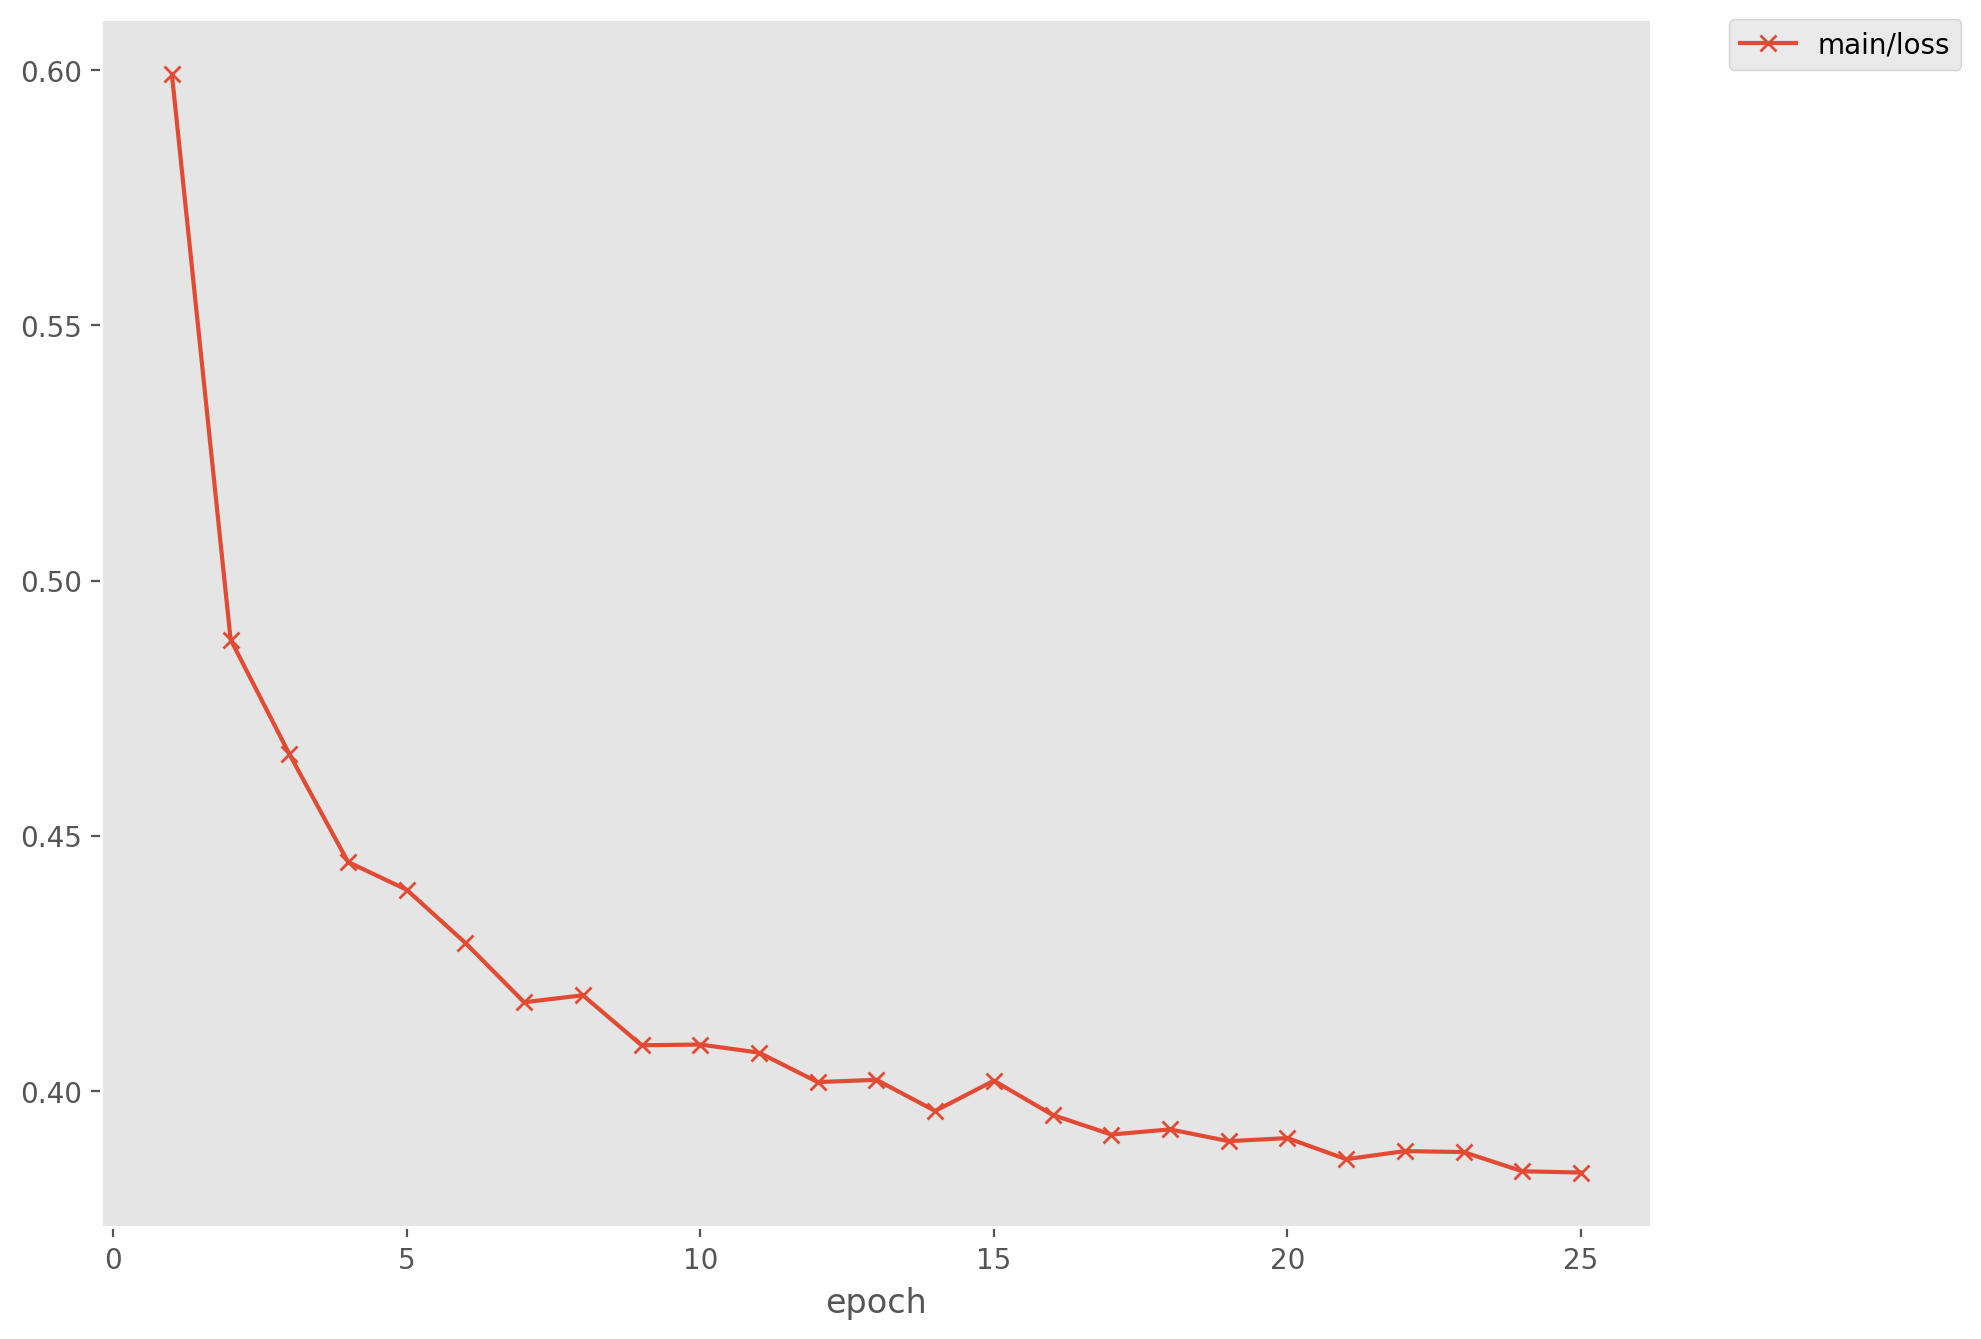

In [48]:
from IPython.display import Image
Image('result/loss.png')

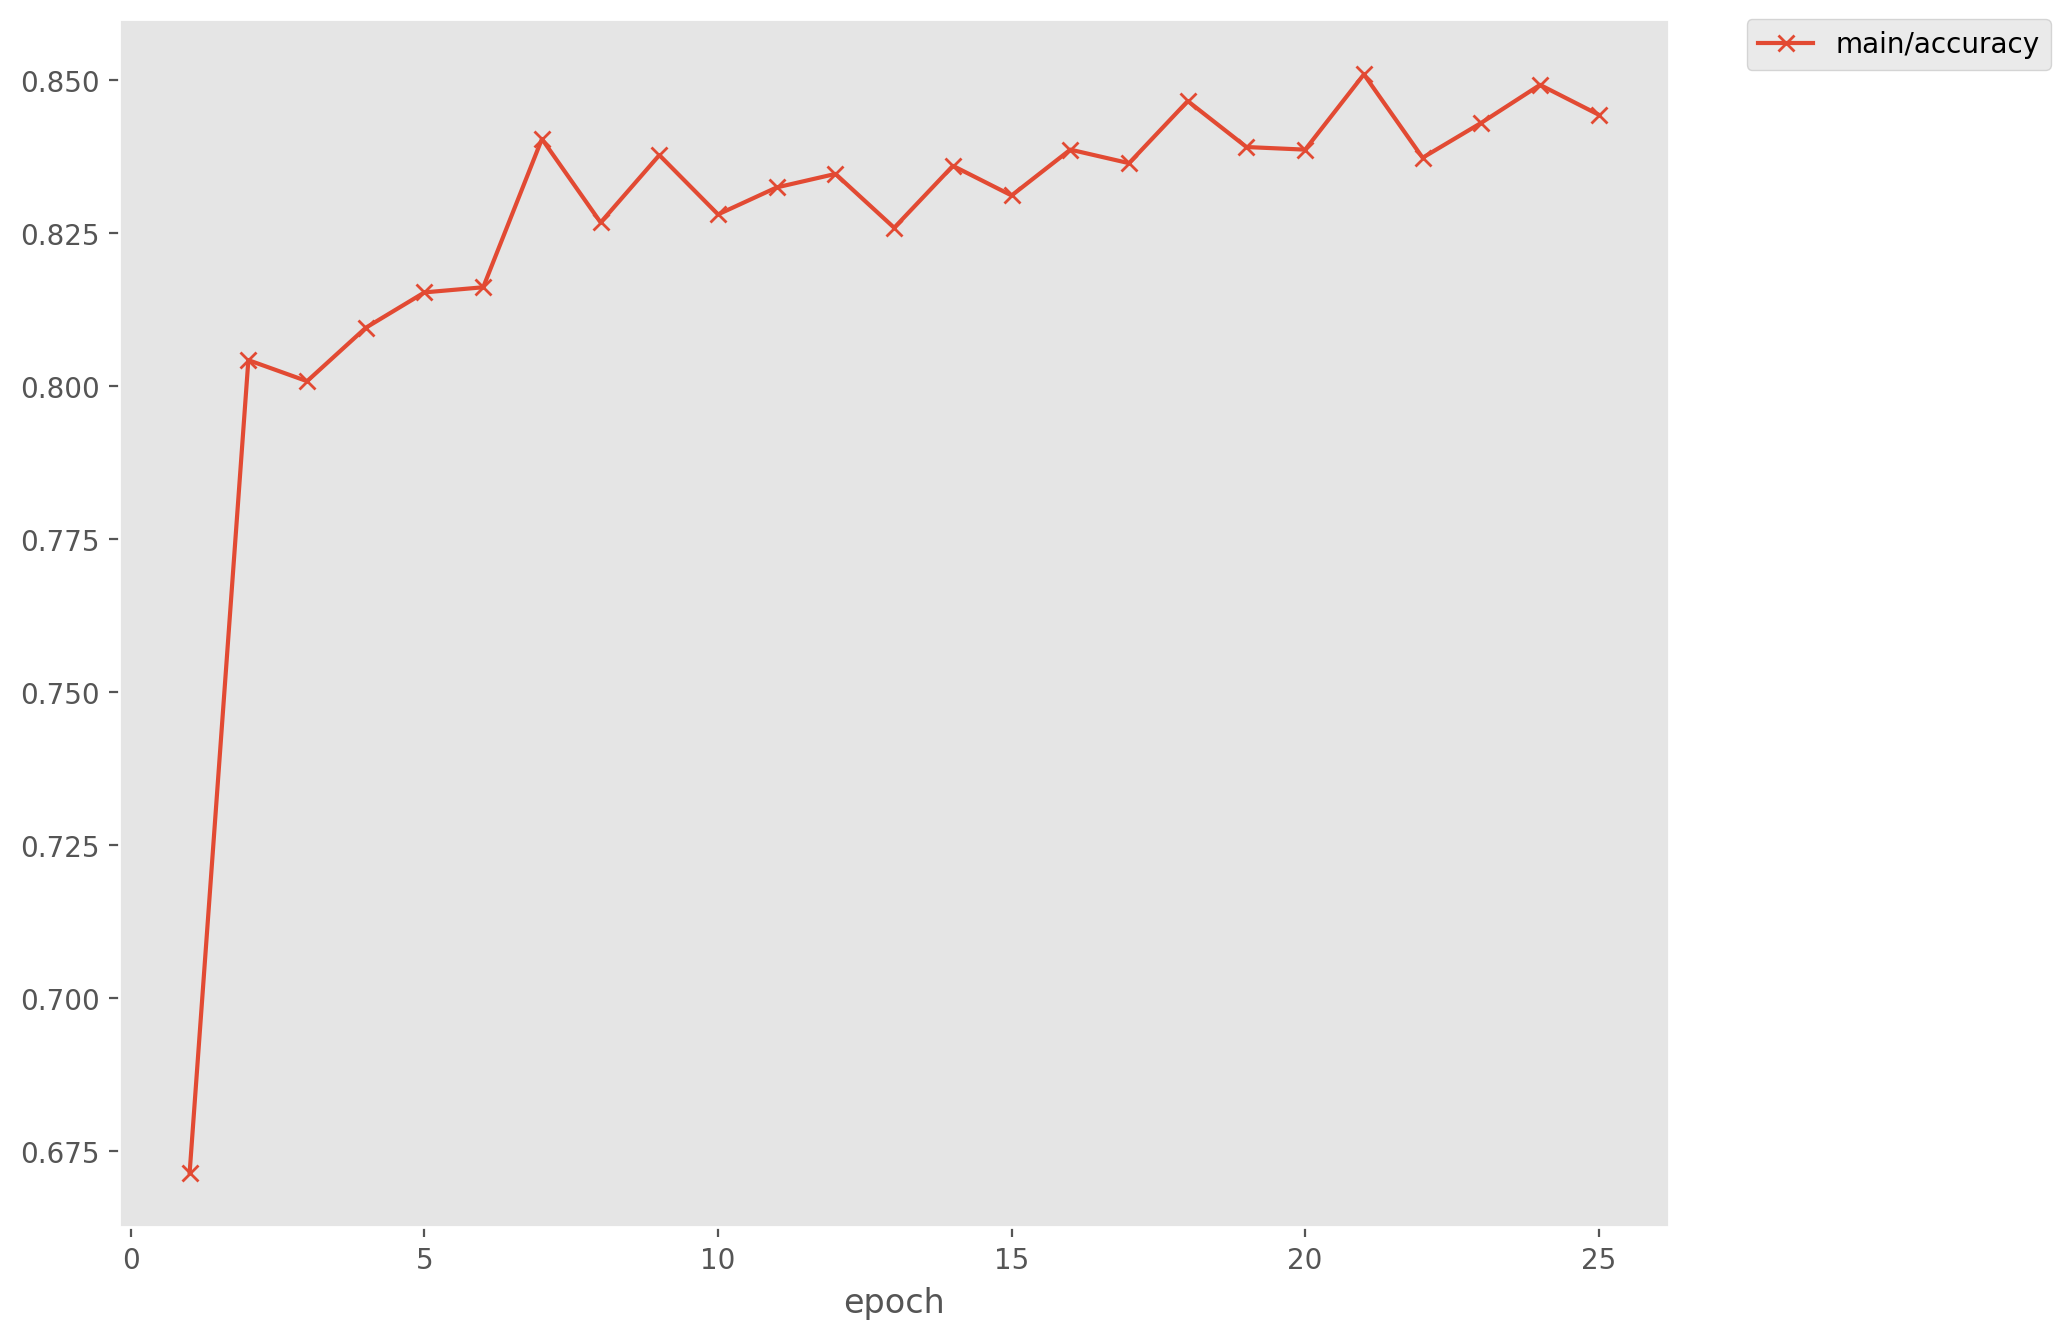

In [49]:
Image('result/accuracy.png')

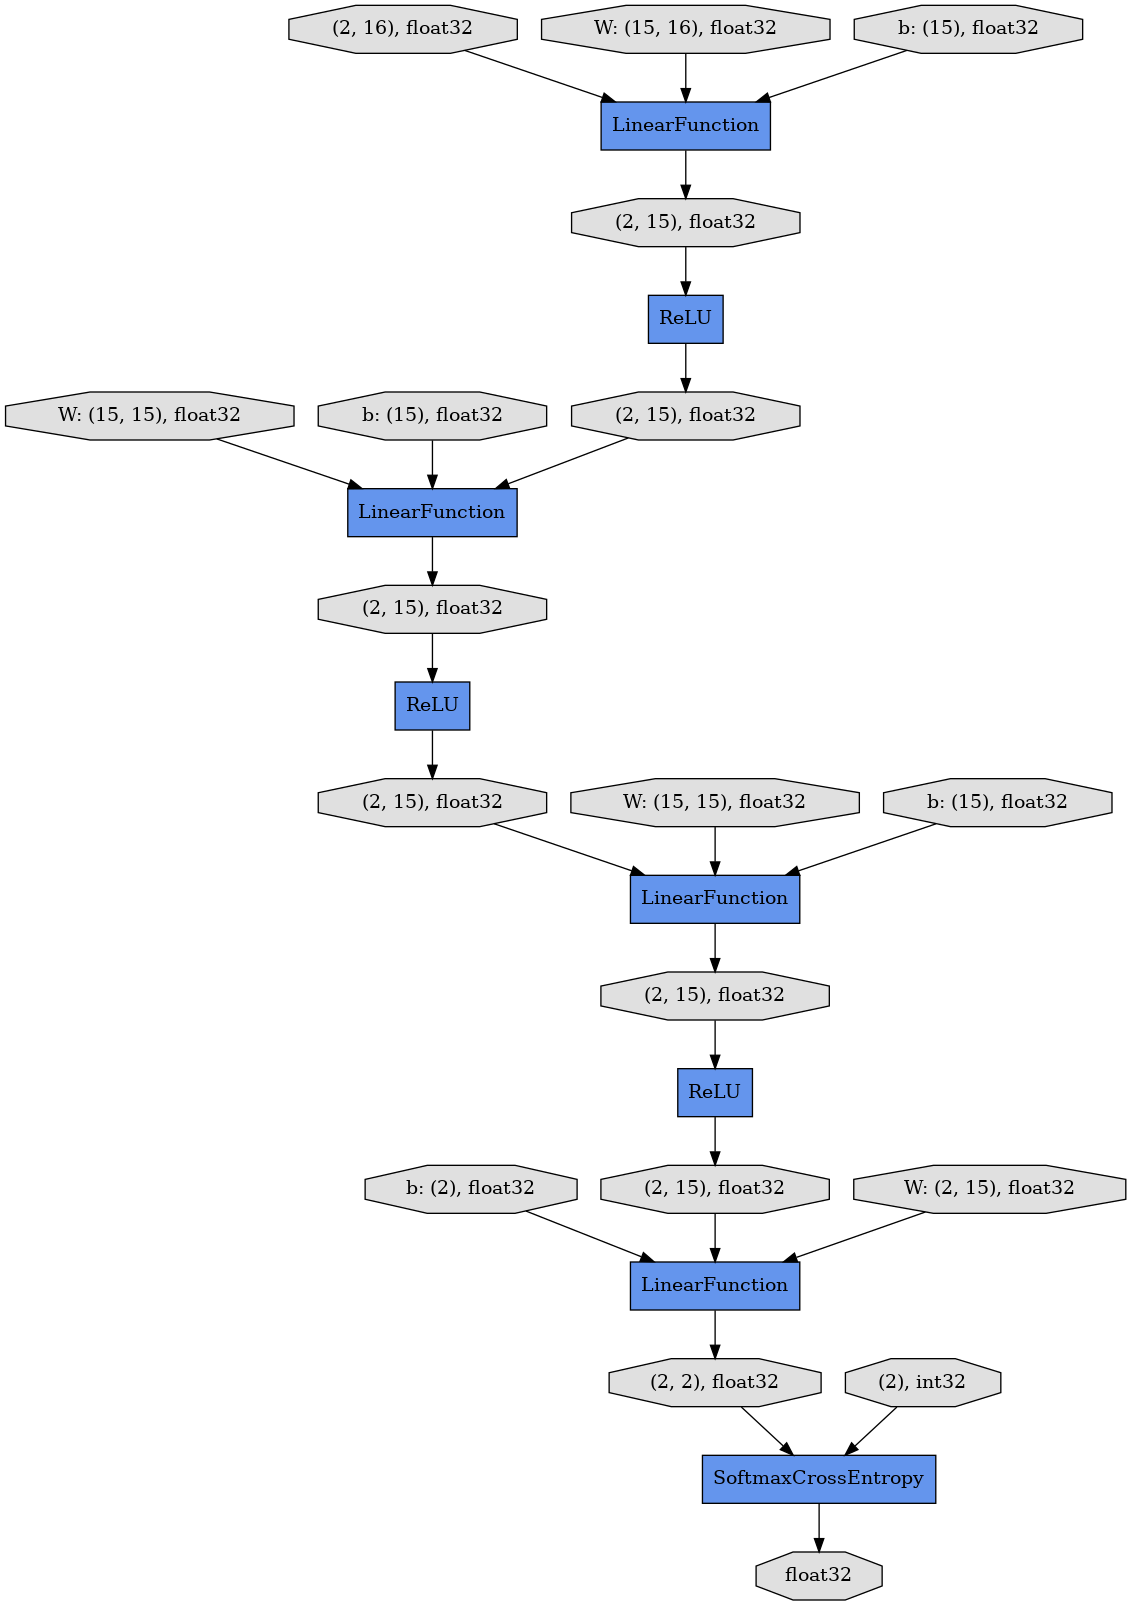

In [50]:
import pydot

file = pydot.graph_from_dot_file('result/cg.dot')
file[0].write_png('graph.png')
Image('graph.png', width=600, height=600)

In [51]:
test_evalutor = extensions.Evaluator(test_iter, model, device=gpu_id)
results = test_evalutor()

print('Test accuracy:', results['main/accuracy'])

Test accuracy: 0.82835823


In [52]:
from chainer import serializers

model.to_cpu()
serializers.save_npz('my_titanic.model', model)

%ls -la my_titanic.model

-rw-r--r-- 1 root root 4708  7月 24 01:51 my_titanic.model


In [53]:
#result = nn(testing_data.astype(np.float32).values)
result = nn(testing_data.astype(np.float32).values)
#print(result.data)
result = [np.argmax(x) for x in result.data]
submission = pd.DataFrame({
    'PassengerId': test_df["PassengerId"],
    'Survived': result
})
submission.to_csv('submission.csv', index=False)

In [53]:
# 推論

#X_test
#testing_data.astype(np.float32)

from chainer import serializers

gpu_id = 0
# まず同じネットワークのオブジェクトを作る
infer_net = L.Classifier(DNN())
# そのオブジェクトに保存済みパラメータをロードする
serializers.load_npz('my_titanic.model', infer_net)
if gpu_id >= 0:
    infer_net.to_gpu(gpu_id)
#infer_model = L.Classifier(infer_net)
#infer_model = infer_net
#if gpu_id >= 0:
#    infer_model = infer_model.to_gpu(gpu_id)
# 行列をニューラルネットワークに渡す
test = np.array(testing_data)
test = test.astype('float32')
#test = test[None, ...]
#test = infer_net.xp.asarray(test)
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    result = infer_net(test)
    print(result)


TypeError: __call__() missing 1 required positional argument: 'x'

In [ ]:
infer_model = L.Classifier(DNN())

serializers.load_npz('my_titanic.model', infer_model)

if gpu_id >= 0:
    infer_model.to_gpu(gpu_id)
    
#x, t = testing_data[2]
#plt.imshow(x.reshape(28, 28), cmap='gray')
#plt.show()
#print('Ground truth:', labels[t])

In [ ]:
# 行列をニューラルネットワークに渡す
testing_data = np.array(testing_data)
#test = np.delete(test, 0, 0)
test = testing_data.astype('float32')
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    result = infer_model(test)
#    print(result)
PassengerId = 891
outputArray = []
for i in range(len(test)):
    PassengerId += 1
    predict = np.argmax(result[i,:].array)
    innerArray = [PassengerId, predict]
    outputArray.append(innerArray)
#    print(predict)
#outputArray = np.array(outputArray)
#outputArray.shape
#outputArray
import pandas as pd
df = pd.DataFrame(outputArray, columns=['PassengerId', 'Survived'])
df.to_csv(path_or_buf='gender_submission.csv', index=False)# index=Falseで行番号を出力しない
df_test_list = pd.DataFrame(outputArray)
#df_test_list.to_csv(path_or_buf='test.csv', index=False)
df_test_list